In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from scipy import stats
import time

# set seaborn settings
sns.set()
plt.rcParams["patch.force_edgecolor"] = True # set lines
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

## import custom helper functions
import helpers as h

In [2]:
econ = pd.read_csv("data/Chicago_Socioeconomic.csv")

In [3]:
econ.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


In [4]:
newEconColumns = ["CommunityAreaNumber", "CommunityAreaName", "PercentHousingCrowded", \
                  "PercentBelowPoverty", "PercentUnemployed", "PercentNoHsDiploma", "PercentUnder18OrOver64", \
                  "PercentCapitaIncome", "HardshipIndex"]

econ.columns = newEconColumns

econ.head()

,CommunityAreaNumber,CommunityAreaName,PercentHousingCrowded,PercentBelowPoverty,PercentUnemployed,PercentNoHsDiploma,PercentUnder18OrOver64,PercentCapitaIncome,HardshipIndex
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


In [5]:
fallDf = pd.read_csv("data/2016/fall.csv")
winterDf = pd.read_csv("data/2016/winter.csv")
springDf = pd.read_csv("data/2016/spring.csv")
summerDf = pd.read_csv("data/2016/summer.csv")

In [6]:
# i don't wanna work on the entire dataset. 
# taking a fraction only.

fallFrac = fallDf.sample(frac = 0.002)
winterFrac = winterDf.sample(frac = 0.002)
springFrac = springDf.sample(frac = 0.002)
summerFrac = summerDf.sample(frac = 0.002)

In [7]:
fall = h.convertDataType(fallFrac)
winter = h.convertDataType(winterFrac)
spring = h.convertDataType(springFrac)
summer = h.convertDataType(summerFrac)

In [8]:
fall["season"] = "Fall"
winter["season"] = "Winter"
spring["season"] = "Spring"
summer["season"] = "Summer"


all = pd.DataFrame()
all = pd.concat([fall, winter, spring, summer])
print(len(all))

39757


In [9]:
all.head()

,taxi_id,tolls,trip_start_timestamp,trip_end_timestamp,company,dropoff_centroid_longitude,dropoff_centroid_latitude,fare,payment_type,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_community_area,pickup_community_area,tips,trip_miles,trip_seconds,trip_total,season
2172376,ad4e285cc063909f5c4550bbc3b71f1c6672b9967c4868...,0.0,10/19/2016 05:45 PM,10/19/2016 06:00 PM,Taxi Affiliation Services,-87.626211,41.899156,8.50,Cash,41.877406,-87.621972,8.0,32.0,0.0,0.0,720.0,9.50,Fall
2693475,672b32a3095e6fbbade933d3bffc431a9e840b9ed25f12...,0.0,10/29/2016 06:15 PM,10/29/2016 06:30 PM,Taxi Affiliation Services,-87.642649,41.879255,7.75,Cash,41.884987,-87.620993,28.0,32.0,0.0,0.0,540.0,7.75,Fall
2168307,9c342c3e26241156bda22e93a566202f8fd3d741fe256a...,0.0,10/19/2016 04:15 PM,10/19/2016 04:30 PM,Taxi Affiliation Services,-87.637844,41.893216,6.00,Cash,41.880994,-87.632746,8.0,32.0,0.0,0.9,360.0,6.00,Fall
1070768,4a6999af87938af4508e5f78d1b369286255414b57bec1...,0.0,09/26/2016 05:15 PM,09/26/2016 05:15 PM,NaN,NaN,NaN,7.00,Credit Card,NaN,NaN,NaN,NaN,2.0,1.2,540.0,9.50,Fall
1862196,ed0f27fd2e6c5845a54ad7d75ac79947ed1ebb11313cc4...,0.0,10/13/2016 05:45 PM,10/13/2016 06:00 PM,NaN,-87.624135,41.849247,13.25,Cash,41.892508,-87.626215,33.0,8.0,0.0,3.4,1020.0,14.75,Fall


Now I have sampled version of each seasons. I'd like to look through the earnings of each company throughout each season to see who earns more. For the sake of simplicity, I'll just look at the "trip_total" column for comparison. 

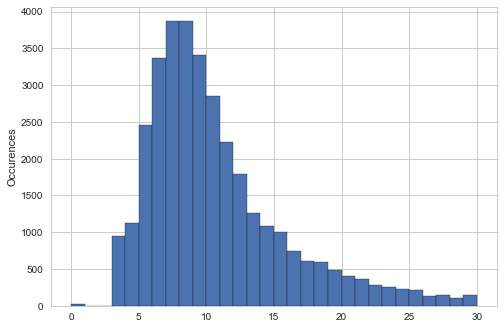

In [10]:
h.buildHistogram(all["trip_total"])

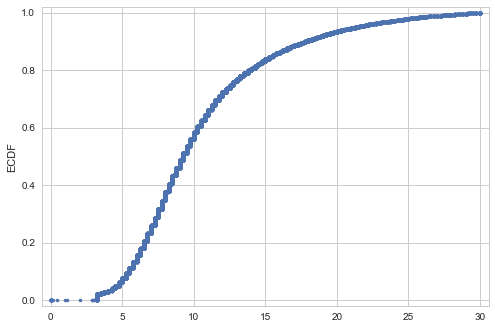

In [11]:
h.buildECDF(all["trip_total"])

In [12]:
all["trip_total"].describe()

count    39757.000000
mean        16.559029
std         17.443740
min          0.000000
25%          7.500000
50%         10.190000
75%         16.500000
max        888.390000
Name: trip_total, dtype: float64

## Comparing seasonal earnings

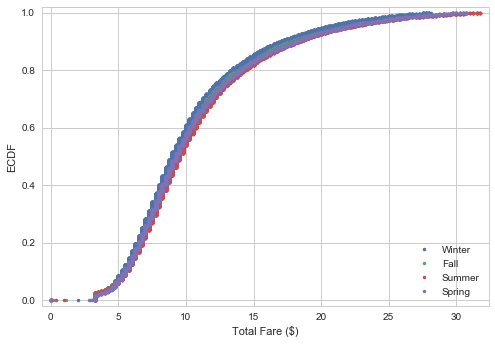

In [13]:
# Generate CDFs
x_winter, y_winter = h.getECDF(winter["trip_total"])
x_fall, y_fall = h.getECDF(fall["trip_total"])
x_summer, y_summer = h.getECDF(summer["trip_total"])
x_spring, y_spring = h.getECDF(spring["trip_total"])

# plot CDFs
_ = plt.plot(x_winter, y_winter, marker = ".", linestyle = "none")
_ = plt.plot(x_fall, y_fall, marker = ".", linestyle = "none")
_ = plt.plot(x_summer, y_summer, marker = ".", linestyle = "none")
_ = plt.plot(x_spring, y_spring, marker = ".", linestyle = "none")

# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('Winter', 'Fall', 'Summer', 'Spring'), loc='lower right')

_ = plt.xlabel("Total Fare ($)")
_ = plt.ylabel("ECDF")
plt.show()

Summer may yield better earnings than Winter due to the good weather. People may want to go out more and take longer trips to farther places. 

In [14]:
winterEarnings = np.array(winter["trip_total"])
summerEarnings = np.array(summer["trip_total"])
springEarnings = np.array(spring["trip_total"])
fallEarnings = np.array(fall["trip_total"])

number_of_experiments = 10000

Are the earnings for the 2 seasons different? If they are identical, they should have the same mean earnings so the difference in the mean earnings should be zero. We'll choose the difference in mean as our test statistic. The P-Value tells you that the percentage of chance that you would get the difference of means observed in the experiment if the earnings yields are exactly the same. 

Let's test out this hypothesis. 

* H0 = There is no difference between Summer and Winter earnings.
* H1 = There is a difference between Summer and Winter earnings. 

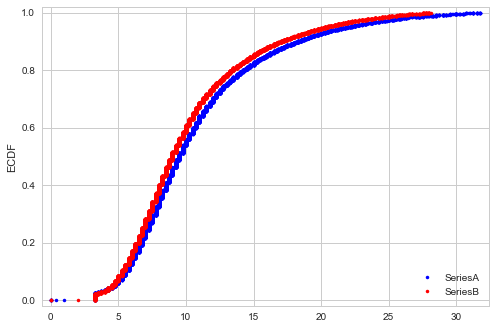

Empirical Difference in Means: 1.1466851655

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.0 | Reject H0


In [15]:
# compare summer and winter earnings
h.compareCDF(summer["trip_total"], winter["trip_total"])
h.identicalMeans(summerEarnings, winterEarnings, number_of_experiments)

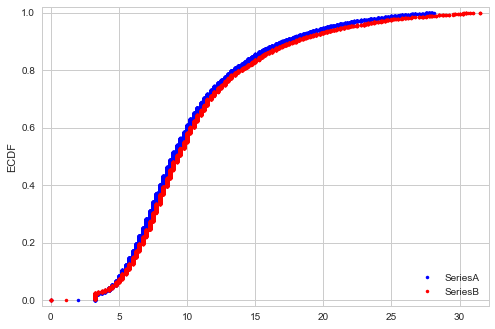

Empirical Difference in Means: -1.39987270383

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.0 | Reject H0


In [16]:
h.compareCDF(winter["trip_total"], fall["trip_total"])
h.identicalMeans(winterEarnings, fallEarnings, number_of_experiments)

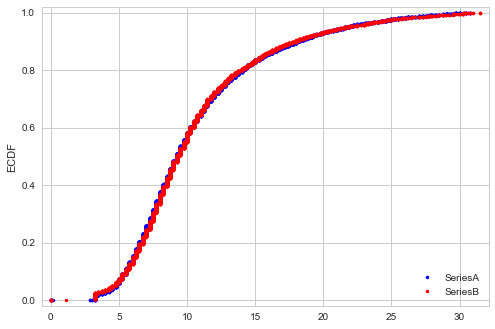

Empirical Difference in Means: -0.804081052256

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.0011 | Reject H0


In [17]:
h.compareCDF(spring["trip_total"], fall["trip_total"])
h.identicalMeans(springEarnings, fallEarnings, number_of_experiments)

What about Fall and Summer?

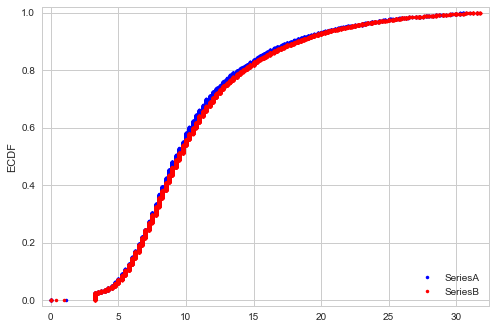

Empirical Difference in Means: 0.253187538328

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.1804 | Fail to reject H0


In [18]:
h.compareCDF(fall["trip_total"], summer["trip_total"])
h.identicalMeans(fallEarnings, summerEarnings, number_of_experiments)

## Comparing taxi companies

Is there a real difference between first place and last place? If so, where do they pick up/drop off their passengers? To find out, I need obtain records with Pickup/Dropoff locations. Unfortunately, some companies do not publish their locations so we can only work with what we have. 

In [19]:
# drop trip records that do not have company name, pickup/dropoff locations
interestedTrips = all.dropna(subset = ["company", "pickup_community_area", \
                                       "dropoff_community_area"])

taxiCompanies = set(np.array(interestedTrips["company"]))
taxiCompanies = list(taxiCompanies)
print(taxiCompanies)

['585 - 88805 Valley Cab Co', '3141 - 87803 Zip Cab', '2823 - 73307 Lee Express Inc', '4197 - 41842 Royal Star', 'Chicago Medallion Management', '5129 - 87128', 'Blue Ribbon Taxi Association Inc.', '0694 - 59280 Chinesco Trans Inc', 'Patriot Trans Inc', '2241 - 44667 Manuel Alonso', '5074 - 54002 Ahzmi Inc', '3556 - 36214 RC Andrews Cab', 'Northwest Management LLC', '1085 - 72312 N and W Cab Co', '6747 - Mueen Abdalla', '5006 - 39261 Salifu Bawa', '0118 - 42111 Godfrey S.Awir', '6574 - Babylon Express Inc.', '3669 - 85800 Jordan Taxi Inc', 'Top Cab Affiliation', '3201 - CD Cab Co Inc', '1247 - 72807 Daniel Ayertey', 'Chicago Medallion Leasing INC', '5997 - 65283 AW Services Inc.', '2192 - 73487 Zeymane Corp', '3319 - CD Cab Co', '4623 - 27290 Jay Kim', 'Chicago Elite Cab Corp. (Chicago Carriag', '6057 - 24657 Richard Addo', '2092 - 61288 Sbeih company', '2823 - 73307 Seung Lee', '3620 - 52292 David K. Cab Corp.', '3591 - 63480 Chuks Cab', '3011 - 66308 JBL Cab Inc.', '3094 - 24059 G.L.

In [20]:
meanEarnings = interestedTrips.groupby(["company"])["trip_total"] \
    .agg(["mean", "count"]).sort_values("mean", ascending = False).reset_index()

# I only care about Taxi companies that made at least 100 trips in 2016
meanEarnings = meanEarnings[meanEarnings["count"] >= 100].reset_index(drop = True)

meanEarnings

,company,mean,count
0,Choice Taxi Association,16.493973,2084
1,Top Cab Affiliation,15.939906,533
2,Dispatch Taxi Affiliation,15.766749,3288
3,KOAM Taxi Association,15.349864,664
4,Taxi Affiliation Services,14.860518,10206
5,Blue Ribbon Taxi Association Inc.,14.536873,2539
6,Chicago Medallion Management,14.457898,157
7,Northwest Management LLC,14.042945,995
8,Chicago Medallion Leasing INC,13.767804,419


In [21]:
first = meanEarnings.head(1)["company"].iloc[0]
print("First:", first)

last = meanEarnings.tail(1)["company"].iloc[0]
print("Last:", last)

firstDf = interestedTrips[interestedTrips["company"] == first]
lastDf = interestedTrips[interestedTrips["company"] == last]

First: Choice Taxi Association
Last: Chicago Medallion Leasing INC


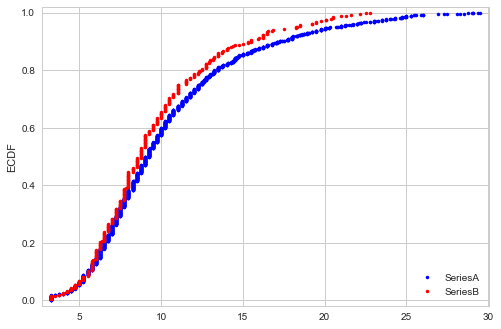

Empirical Difference in Means: 2.7261688326561284

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.0003 | Reject H0


In [22]:
h.compareCDF(firstDf["trip_total"], lastDf["trip_total"])

h.identicalMeans(firstDf["trip_total"], \
                 lastDf["trip_total"], \
                 number_of_experiments)

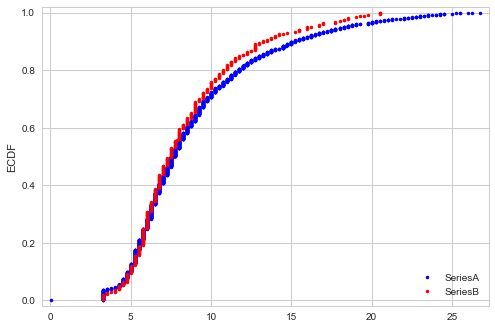

Empirical Difference in Means: 1.945588871227077

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.001 | Reject H0


In [23]:
h.compareCDF(firstDf["fare"], lastDf["fare"])
h.identicalMeans(firstDf["fare"], lastDf["fare"], number_of_experiments)

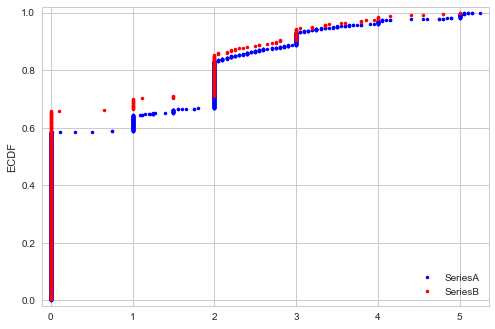

Empirical Difference in Means: 0.7146433904873601

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.0 | Reject H0


In [24]:
h.compareCDF(firstDf["tips"], lastDf["tips"])
h.identicalMeans(firstDf["tips"], lastDf["tips"], number_of_experiments)

### Joining socioeconomic data

In [25]:
firstDf.head()

,taxi_id,tolls,trip_start_timestamp,trip_end_timestamp,company,dropoff_centroid_longitude,dropoff_centroid_latitude,fare,payment_type,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_community_area,pickup_community_area,tips,trip_miles,trip_seconds,trip_total,season
1694077,217db7925d31ecdc9b16571c0c900d0708676fc0a58d97...,0.0,10/09/2016 07:00 PM,10/09/2016 07:00 PM,Choice Taxi Association,-87.618868,41.890922,8.00,Cash,41.880994,-87.632746,8.0,32.0,0.00,1.6,480.0,9.00,Fall
431270,3faf465f2a9568fcd32838685114495ac74f11a3cf17d4...,0.0,09/10/2016 11:15 PM,09/10/2016 11:15 PM,Choice Taxi Association,-87.642649,41.879255,8.75,Cash,41.904935,-87.649907,28.0,8.0,0.00,2.1,480.0,9.75,Fall
2360306,0a5dfb0d81ebf2fc3e48921ca874c63dd8b31d3728d09a...,0.0,10/23/2016 02:00 AM,10/23/2016 02:00 AM,Choice Taxi Association,-87.632746,41.880994,5.25,Cash,41.880994,-87.632746,32.0,32.0,0.00,0.6,240.0,6.25,Fall
2120112,7e7dce4bc47f1de9dd9e4fe427408dbf9fc61d786574a5...,0.0,10/18/2016 04:45 PM,10/18/2016 05:00 PM,Choice Taxi Association,-87.619711,41.895033,5.00,Cash,41.892073,-87.628874,8.0,8.0,0.00,0.6,180.0,6.00,Fall
492718,8e5856141b569bb9dbbccc80fcf2b8225ae80e93accbe4...,0.0,09/13/2016 01:15 PM,09/13/2016 01:30 PM,Choice Taxi Association,-87.622173,41.870607,11.00,Credit Card,41.900221,-87.629105,32.0,8.0,2.75,2.4,960.0,13.75,Fall


In [26]:
len(firstDf)

2084

In [27]:
## the taxi data's community area data is in the decimal format. 
## formatting the econ data to follow the same format. 

econ["CommunityAreaNumber"] = econ["CommunityAreaNumber"]\
    .astype("float").fillna(0.0)

In [28]:
econ.head()

,CommunityAreaNumber,CommunityAreaName,PercentHousingCrowded,PercentBelowPoverty,PercentUnemployed,PercentNoHsDiploma,PercentUnder18OrOver64,PercentCapitaIncome,HardshipIndex
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


In [29]:
firstEcon = pd.merge(firstDf, econ, left_on = "pickup_community_area", \
                     right_on = "CommunityAreaNumber", how = "inner")

len(firstEcon)

2084

In [30]:
firstEcon.head()

,taxi_id,tolls,trip_start_timestamp,trip_end_timestamp,company,dropoff_centroid_longitude,dropoff_centroid_latitude,fare,payment_type,pickup_centroid_latitude,...,season,CommunityAreaNumber,CommunityAreaName,PercentHousingCrowded,PercentBelowPoverty,PercentUnemployed,PercentNoHsDiploma,PercentUnder18OrOver64,PercentCapitaIncome,HardshipIndex
0,217db7925d31ecdc9b16571c0c900d0708676fc0a58d97...,0.0,10/09/2016 07:00 PM,10/09/2016 07:00 PM,Choice Taxi Association,-87.618868,41.890922,8.00,Cash,41.880994,...,Fall,32.0,Loop,1.5,14.7,5.7,3.1,13.5,65526,3
1,0a5dfb0d81ebf2fc3e48921ca874c63dd8b31d3728d09a...,0.0,10/23/2016 02:00 AM,10/23/2016 02:00 AM,Choice Taxi Association,-87.632746,41.880994,5.25,Cash,41.880994,...,Fall,32.0,Loop,1.5,14.7,5.7,3.1,13.5,65526,3
2,b93c28eb6398634edc1e54ce862f4342040d61a41599a0...,0.0,09/30/2016 09:30 AM,09/30/2016 09:30 AM,Choice Taxi Association,-87.642649,41.879255,6.00,Credit Card,41.880994,...,Fall,32.0,Loop,1.5,14.7,5.7,3.1,13.5,65526,3
3,ecbd0442d6b871f22f17122917c37190e9aaf098687b39...,0.0,10/13/2016 11:15 PM,10/13/2016 11:30 PM,Choice Taxi Association,-87.619711,41.895033,8.50,Cash,41.880994,...,Fall,32.0,Loop,1.5,14.7,5.7,3.1,13.5,65526,3
4,a4e7b77d5c841738f0aa3a2d0422a7d2815d9b3ab302fe...,0.0,10/24/2016 09:00 PM,10/24/2016 09:00 PM,Choice Taxi Association,-87.642808,41.885300,6.00,Credit Card,41.880994,...,Fall,32.0,Loop,1.5,14.7,5.7,3.1,13.5,65526,3
